# 1. Composition of Functions
This is a post that I have been excited to write for some time now. I realize that if you are reading this blog you most likely already have good handle on what a **function** is; both in the context's of mathematics and computer science. However, I recently saw just how shallow my own understanding was during my quest to understand the history of the **normal distribution**.

For those unfamiliar, I highly recommend go through my post on the subject (in the mathematics/statistics section), but for the sake of making this post 100% stand alone, I will provide a brief background; it is essential in setting the stage for the problem that we are trying to solve. Please keep in mind that the purpose of this notebook is _not_ to discuss statistics and probably distributions; these curves are simply being used as lens for which we can think about functions, function compositions, and how functions are discovered.

### 1.1 Background of Normal Distribution
The Normal Distribution, also known as the **Gaussian Distribution**, has an incredibly deep history, and even greater number of domains where it is applied; we will not talk about them here, however. For that I recommend looking through my other notebooks, digging into the **Central Limit Theorem**, **sampling**, **Gaussian Mixture Models**, distributions in the social sciences, **hypothesis testing**, and so on. 

The purpose of this post is to uncover what bothered me while learning about so many of the above topics: 

> Where did the equation that represents the Gaussian Distribution come from?

If you are unfamiliar with the normal distribution, here are a few key points:
* It is a **continuous** probability distribution (a continuous function).
* It is often used to describe a **random variable** whose distribution is not known, but is thought to represent a gaussian data generating process
* It plays a large role in **statistical inference** based on its use in the central limit theorem.

Mathematically, the Normal Distribution is defined as follows:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

Where $\mu$ is the **mean**/**expectation** of the distribution, $\sigma$ is the **standard deviation**, and $\sigma^2$ is the **variance**. If you are rusty on your understanding of the prior term's definitions, I recommend reviewing my previous post. It is worth noting that the normal distribution is parameterized by $\mu$ and $\sigma^2$, and it can be stated verbally as:

> It is a curve representing the probability distribution of the random variable $x$ given $\mu$ and $\sigma^2$.


There is one point of confusion that isn't particulary important for our purposes, but that I will cover for clarity:
* The normal distribution is a **probability density function**. What this means is that we cannot simply plug in a value, $x$, and evaluate the probability of observing that particular value. This is because an continuous random variable can take on an _infinite_ number of values, and the probability of observing a particular one is zero. Instead, the normal distribution is evaluated at each $x$, and the curve that is produced (seen below) can be used to determine the probability that $x$ will fall in certain _intervals_. 
 

With that said, visually it looks like:

In [1]:
import numpy as np
from scipy.stats import bernoulli, binom, norm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

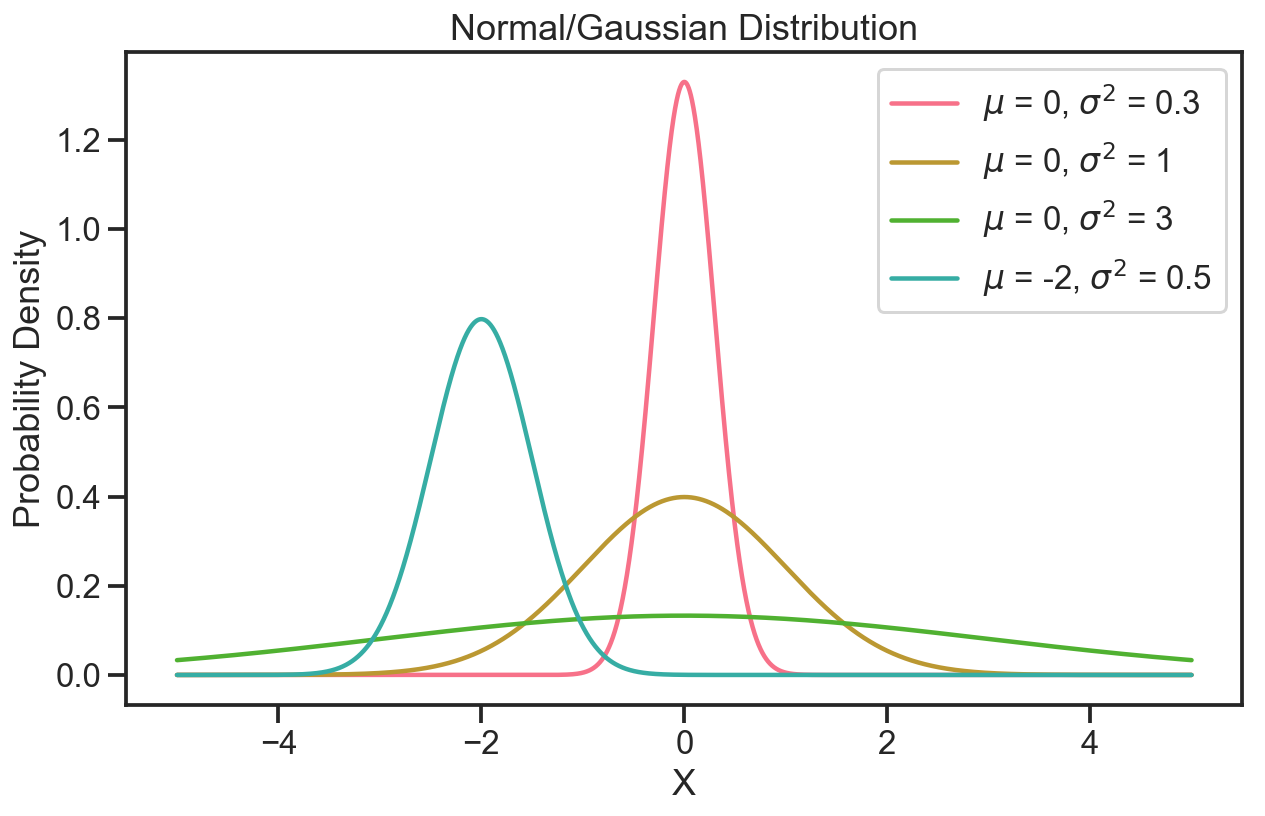

In [2]:
fig = plt.figure(figsize=(10,6))
means = [0, 0, 0, -2]
variances = [0.3, 1, 3, 0.5]
x_axis = np.arange(-5, 5, 0.001)
legend = []
for mu, var in zip(means, variances):
    plt.plot(x_axis, norm.pdf(x_axis,mu,var))
    legend.append(f'$\mu$ = {mu}, $\sigma^2$ = {var}')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal/Gaussian Distribution')
plt.legend(legend)

plt.show()

The graph above is incredibly important to keep in mind throughout this post! Take a moment to think above how on earth this was derived? Likewise, think about the shape (bell shape)-how would you take an input (the curve $y=x$), and transform it to have that shape? 

That was the problem that **[Abraham de Moivre](https://en.wikipedia.org/wiki/Abraham_de_Moivre)** faced in the mid 1700's. He and many colleagues, had observered that certain random processes began to take on the **binomial distribution** when repeated many times (green discrete distribution below). 

They realized that in order to keep their calculations computationaly feasible, they must determine an **approximation** to this discrete distribution (curve in red below).

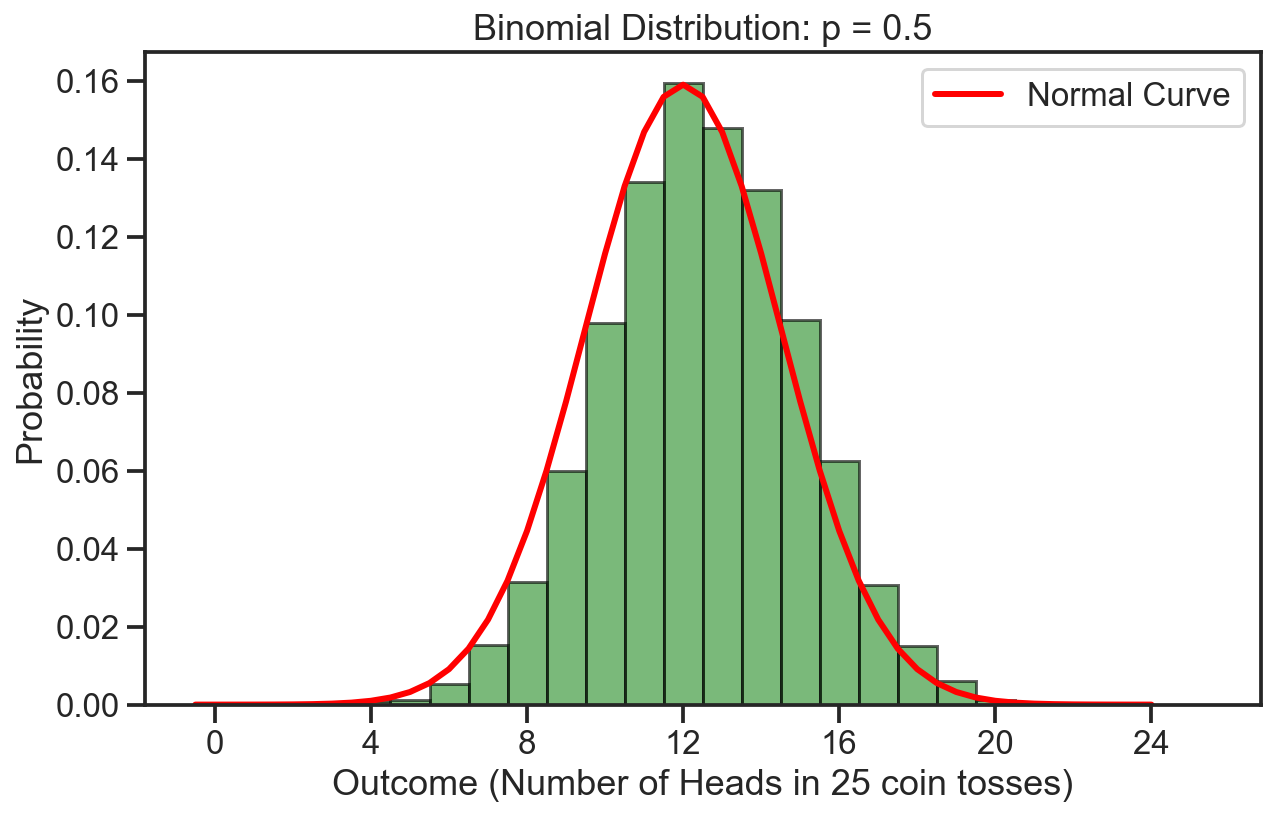

In [3]:
# generate binomial, n=25
fig = plt.figure(figsize=(10,6))
n = 25
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 25 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)
x = np.arange(0, 25, 0.5)
p = norm.pdf(x, 12.5, data_binom.std())
plt.plot(x, p, 'k', linewidth=3, c='r')
plt.legend(['Normal Curve'])

plt.show()

Which brings us to our main goal in this post, that is to answer the following:

> How would _you_ derive the equation of the red curve in the above plot?

This is by no means an easy question to answer! It took some of the worlds brightest minds many years to come to normal distribution equation we saw earlier. However, I found that the most fundamental gap I needed to fill in order to answer the above question was that relating to **functions**, particularly their **composition**. 

## 2. Functions: Mapping _input_ to _response_
Forget $x$s and $y$s for the moment, forget equations that have been rotely memorized. What is a function, and why would we even need one? 

Well let's consider the real world scenario where you are trying to buy a car. Let's say you know that the car was made in 2010 and it has 100,000 miles on it. Intuitively, and without even realizing it, you create a function that maps those features of the car, to what you feel it is worth. Maybe you think that car is worth 4,000 dollars. That means that in some way you decided in your head that there is a function, which we can call $Car \;Price \;Estimator$:

$$Function = Car \; Price \; Estimator $$

And it takes two inputs, the year it was made and the number of miles on it:

$$Car \; Price \; Estimator (Year \; made, number \; of \; miles)$$

And that yielded an output, of 4,000 dollars:

$$Car \; Price \; Estimator (2010, 100000 \;miles) = 4000 \; dollars$$

This can be seen visually as well:

<br>
<img src="https://drive.google.com/uc?id=1nzWv2dubxT8dLgOcF_fR07uUqiyM74X4" width="600">
<br>

Think of how often that may happen-a situation where you take in information about the world around you, and you then say "hmmm there is definitely a relationship between these two things". Well, in mathematical terms that relationship is a function. If you are wondering, "why do we need to turn a normal everyday relationship into a mathematical equation?", well, the simplest answer is because it allows you to do very powerful things. 

As a motivator for why functions are so powerful I will leave you with this list of what they can and currently do:
1. We can create functions that define the relationship between certain images of tumor cells and whether or not the patient actually has cancer

$$Function = Cancer \; Detector$$

$$Cancer \; Detector(\text{Image of tumor cells}) \rightarrow \text{Patient has cancer, yes or no}$$

2. We can create functions that take in thousands of pixels associated with image and then determine what is in that image

$$Function = Image \; Classifier$$

$$Image \; Classifier(\text{Image of dog on a boat}) \rightarrow \text{Image contains: Dog, boat}$$


3. We can create functions that predict given a certain population and its characteristics, how quickly will a disease spread. 

$$Function = Disease \; Spread$$

$$Disease \; Spread(\text{Population Characteristics}) \rightarrow \text{Disease spread rate}$$

Okay, so with that in mind I want us to remember that a function can be thought of as a map of a relationship. From a more abstract point of view, a function can be considered a **process** that relates (or maps) an input to a single element, the output:

<img src="https://drive.google.com/uc?id=1x-CFHKN2EpAvQfRCxrhaZmDeWUNpHSKY" width="500">

Bringing in a slightly more formal terminology, we say that:

> A function is a relationship that associates each element $x$ of a set $X$, the **domain** of the function, to a single element $y$ of another set $Y$ (possibly the same set), the **codomain** of the function. If the function is called $f$, the relation is denoted $y= f(x)$.

### 2.1 Graphs of Functions
Now that we have an intuitive understanding of what a function is actually representing, we can move on to graphing of a function. There is something incredibly subtle that takes place here, of which there is utmost importance that we fully grasp before moving on. 

Let's consider the function:

$$f(x) = x^2$$

This is a very simple function, which I am confident that anyone reading this post has come across before; it can be visualized below:

In [4]:
from matplotlib import rc, animation
sns.set_style("whitegrid")
sns.set_context("talk", rc={"lines.linewidth": 2})
rc('axes', linewidth=2)
sns.set_palette("tab10")

def square(x):
    return x ** 2

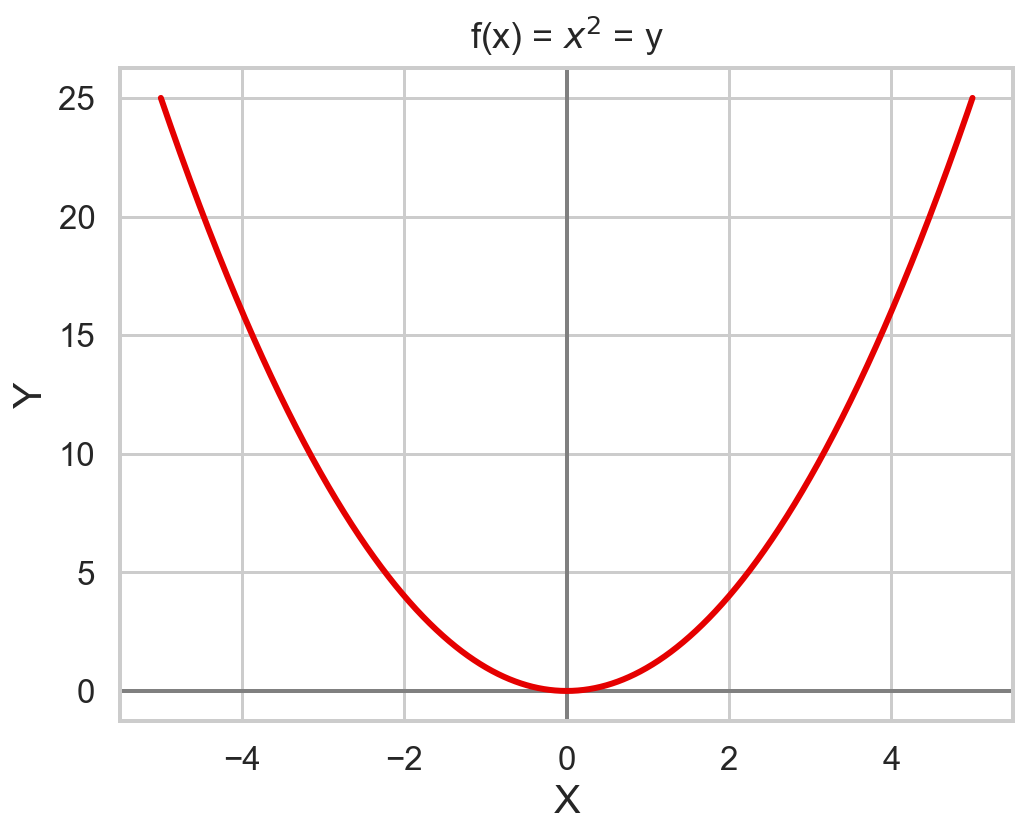

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x = np.linspace(lower_bound, upper_bound, length)
y = square(x) 

plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])
plt.title(r'f(x) = $x^2$ = y', pad="10")
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

Nothing ground breaking going on just yet. Now, an equivalent representation (_isomorphic_ if you will), can be seen in the following table:

|x|f(x)|
|---|---|
|-5|25|
|-4|16|
|-3|9|
|-2|4|
|-1|1|
|0|0|
|1|1|
|2|4|
|3|9|
|4|16|
|5|25|

I don't imagine that anyone would disagree with me in saying that the table and graph are equivalent representations of the same thing; that is the function $f(x) = x^2$ evaluated from $[-5, 5]$ (for all integers within the interval). Now, as students we are taught to view the function, $f$, and it's graphical representation as _equivalent_. And, for the most part this is true. However, this view point is slightly narrow and can lead to confusion, especially as we move into advanced mathematics or coming up with original solutions on our own.

#### 2.1.1 Ordering of $x$ inputs 
To build a better intuition for how a function and it's graphical representation relate, let's start by rearranging the inputs $x$ in the table above to be as follows:

|x|f(x)|
|---|---|
|-5|25|
|-3|9|
|-4|16|
|2|4|
|5|25|
|-1|1|
|3|9|
|0|0|
|1|1|
|2|4|
|4|16|
|-2|4|

Each individual row is entirely valid; take a moment to convince yourself of that. However, our $x$ values are no longer _ordered_. This means that if we were to go down our table row by row, plot each point and then connect it to the the point in the row beneath by a line we would end up with:

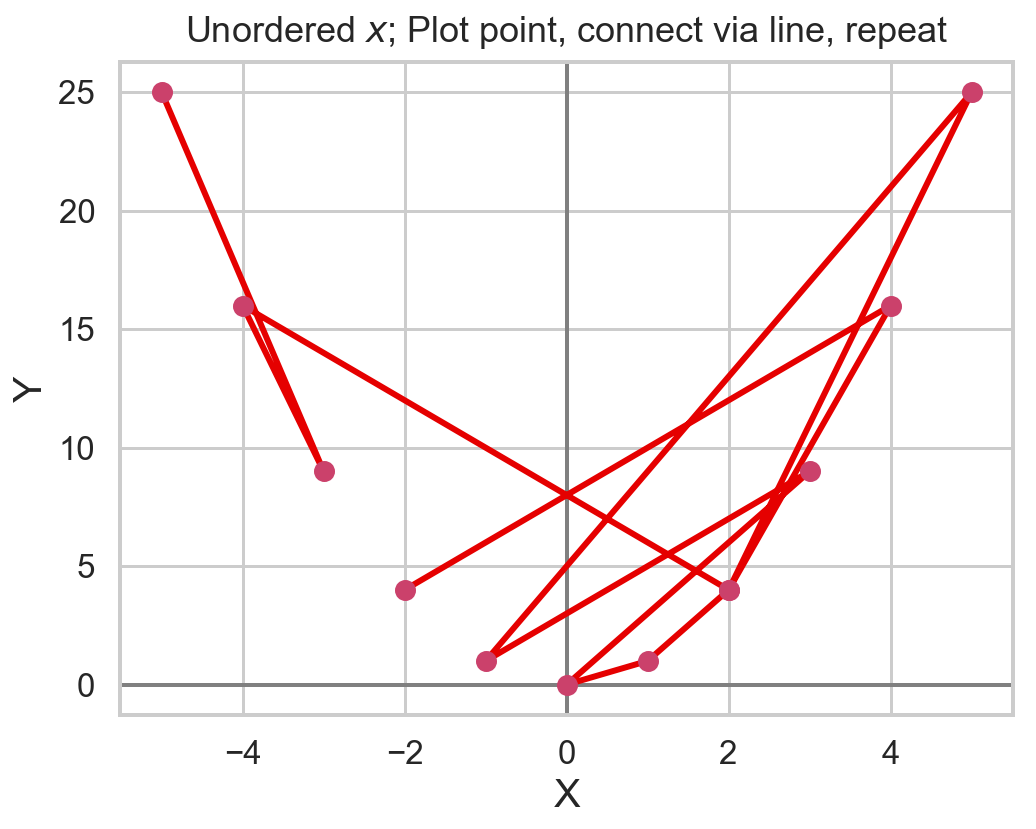

In [37]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey', zorder=1)
plt.axvline(x=0, color='grey', zorder=1)

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x = np.array([-5,-3,-4,2,5,-1,3,0,1,2,4,-2])
y = square(x) 

plt.scatter(x, y, c=sns.xkcd_rgb["dark pink"], zorder=3)
plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"], zorder=2)

plt.title(r'Unordered $x$; Plot point, connect via line, repeat', pad="10")
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

Clearly this is not a valid function as presented above! Yet, this _does not_ mean that the table above is invalid! A function _does not need_ to take in an interval of ordered $x$ inputs; a function can take in anything that is part of it's domain (in this case all real numbers). 

The reason for the mixup was in the methodology for creating the final curve. I chose iterate down the table, row by row, plotting the point in my current row, then plotting the point in the next row, and connecting them by a line immediately. This was repeated for the whole table. In other words I did:

$$(-5, 25) \rightarrow (-3, 9) \rightarrow (-4, 16) \rightarrow ...$$

You can see that by plotting a point and then immediately using a line to connect to the next point we can run into issues. 

> This is because we are introducing a **time** component without even meaning to! It is a side effect of human nature; we introduce this time component because given pen and paper that is how _we would draw the curve from left to right_. 

However, our function has no concept of time (it's only parameter is $x$). A more appropriate way to plot our function would be to plot all points at once, and _then_ connect from left to right with a line of best fit:

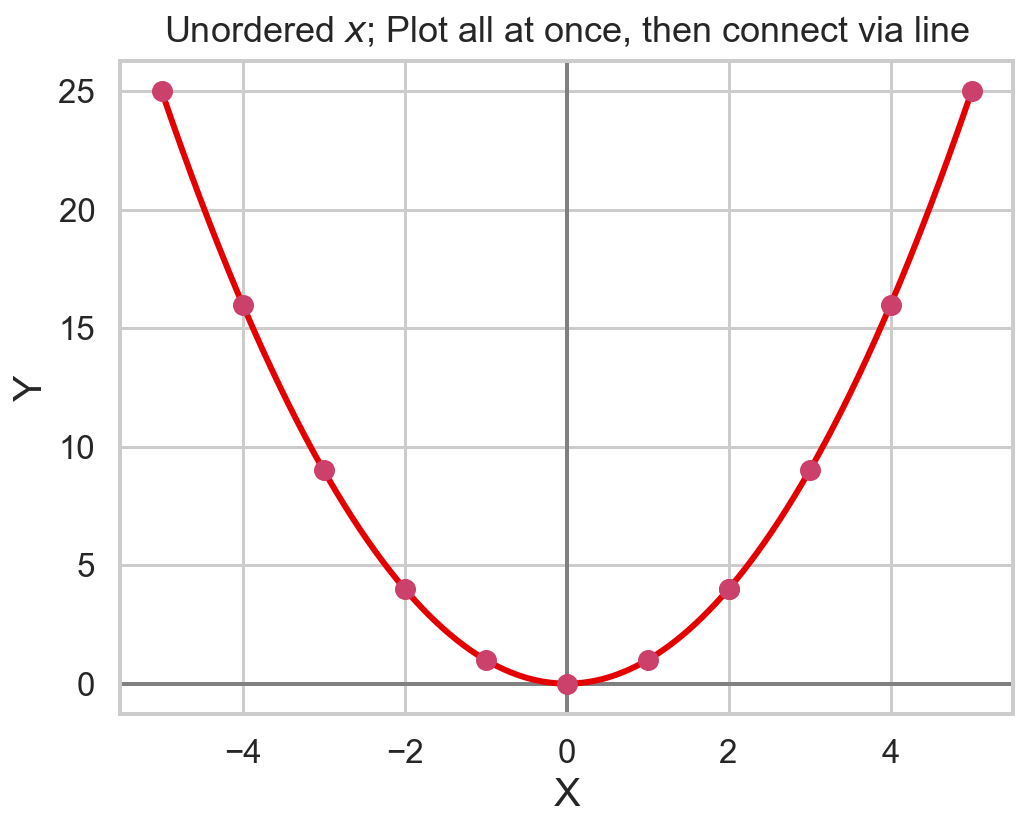

In [36]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey', zorder=1)
plt.axvline(x=0, color='grey', zorder=1)

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x = np.array([-5,-3,-4,2,5,-1,3,0,1,2,4,-2])
y = square(x) 

plt.scatter(x, y, c=sns.xkcd_rgb["dark pink"], zorder=3)

x = np.linspace(lower_bound, upper_bound, length)
y = square(x) 
plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])

plt.title(r'Unordered $x$; Plot all at once, then connect via line', pad="10")
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

We see above that even though our $x$ inputs were not ordered (we plotted based on the ordering of the second table), we have the curve that we would expect. That is because this time all points were plotted first, and _then_ the line of best fit was drawn.

#### 2.1.2 Inputs to the graphical representation of $f$
Now we have dug into the ordering of $x$ inputs when dealing with a graphical representation of a function, let's pick things up a notch. I pose the following question: when graphing the function $f(x)$, how many inputs does $f$ take?

You may sit back and laugh when asked; surely if our function $f$ takes in a single input $x$, then the graphical representation of $f$ must only take in a single input, $x$, as well! 

Not so fast! While our function $f$ only takes a single input $x$, we have to keep in mind that $f$ only does one thing: it maps an input to an output:

$$f(input) \rightarrow output$$

$$f(-4) \rightarrow 16$$

$$f(4) \rightarrow 16$$

Yet, inherently a graphical representation of a function deal with _two things_: an input **value** and an input **location**. Let me explain via an example. Consider the case of our squaring function, you may initially think that the input to output mapping would look like:

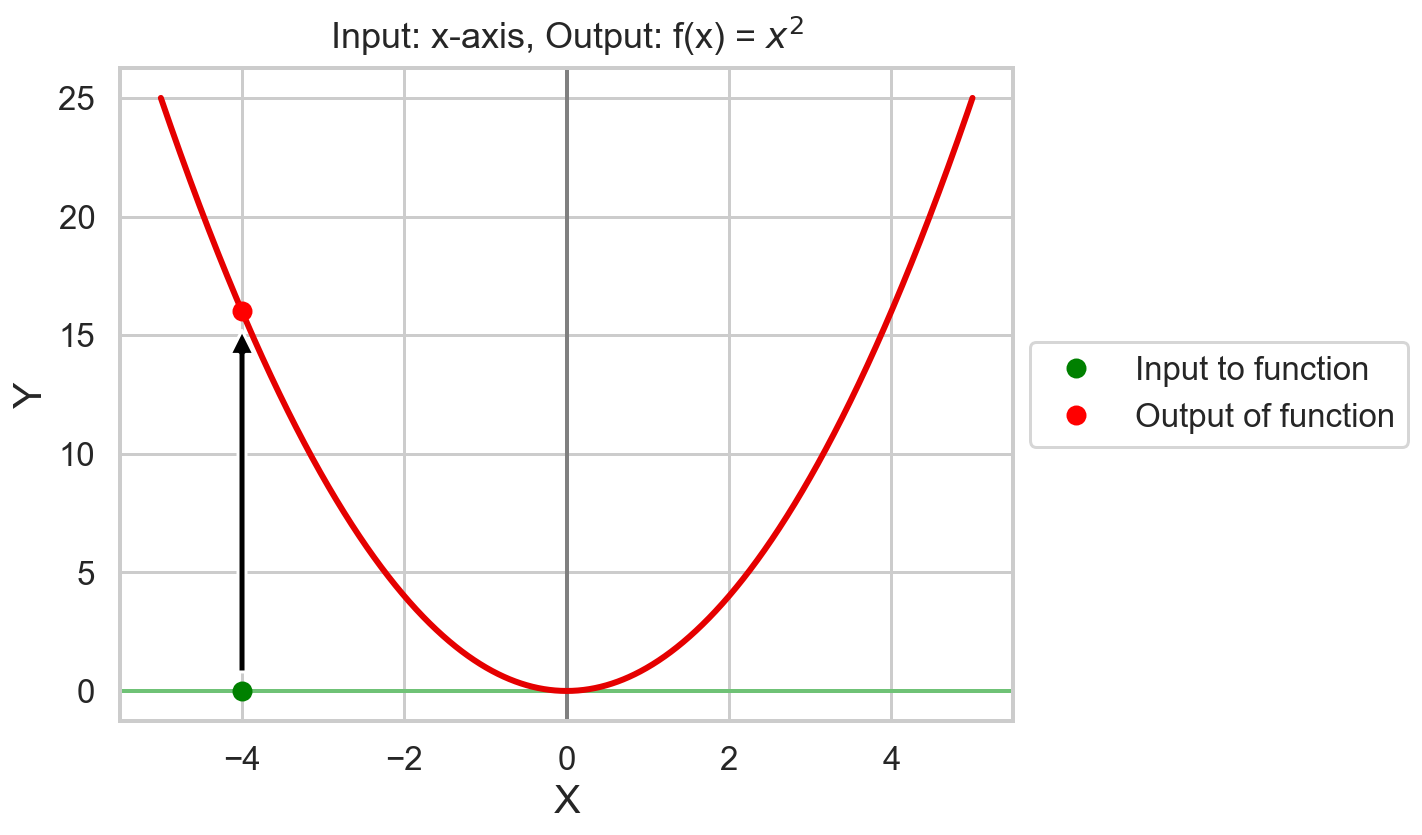

In [39]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color=sns.xkcd_rgb["soft green"])
plt.axvline(x=0, color='grey')

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x = np.linspace(lower_bound, upper_bound, length)
y = square(x) 

plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])

marker_squared, = ax.plot(-4, 16, 'or', zorder=5)
marker_x, = ax.plot(-4, 0, 'og', zorder=5)

func_arrow_square = ax.annotate(
    '',
    xy=(-4, square(-4)),
    xytext=(-4, 0),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

plt.title(r'Input: x-axis, Output: f(x) = $x^2$', pad="10")

ax.legend(
    (marker_x, marker_squared),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

The above plot is correct in that it takes an input $x=-4$, evaluates the function $f$, and plot's the result. So, our coordinates are mapped as such:

$$(-4, 0) \rightarrow (-4, 16)$$

Notice that our $x$ coordinate does not change. That is a fundamental concept of graphical representations of functions. When you evaluate a particular input from the domain, $x$, you then graph the output, $y$ at the same $x$ coordinate. This is seen clearly by the black arrow representing our squaring function, $f$; notice that it is **perpendicular** to the $x$ axis. Realize that this is _not_ a fundamental property of the function $f$; rather it is used specifically by the graphical representation. To really highlight this point:

**Stand Alone Function**<br>

$$f(x) \rightarrow y$$

$$f(-4) \rightarrow 16$$

**Graphical Representation of Function**<br>

$$f(x_{location}, x_{value}) \rightarrow (x_{location}, y)$$

$$f((-4, 0)) \rightarrow (-4,16)$$

In the graphical representation of the function, $f$ now takes in a **point**, $(-4, 0)$, instead of simply a stand alone value, $-4$. This is often a new way of view functions for most people (myself included), so I encourage you to take a moment to let this subtle change sink in. Once you have, you may realize what was wrong with the plot above. 

Based on the idea that in reality the graphical representation of a function must take in _two_ inputs, $x_{location}$ and $x_{value}$, you can see what is wrong with our green input point. It's $x_{location}$ is correct; it is equal to -4. However, it's $x_{value}$ is incredibly ambiguous! You most likely determine in your head that the $x_{value}$ must also be -4, but based on the visual representation we have provided, is is actually 0! This is often the case when we take our $x$ axis and treat it both as the location and value of our input.

Why is this so important? Well, it creates an incredibly shaky foundation for us to build a top of if we ever want to be able to derive our own unique solutions! There is no way to fully intuit function composition and derive the normal distribution if we are working inside of this ambigious frame work. The solution is as follows:

> We need to ensure that when graphing functions our input curve/point has an unambiguous $x_{location}$ and $x_{value}$.

This can be done by no longer using the $x$ axis as both the location and input to our function, but instead use the line $y=x$! Visually this will become more clear:

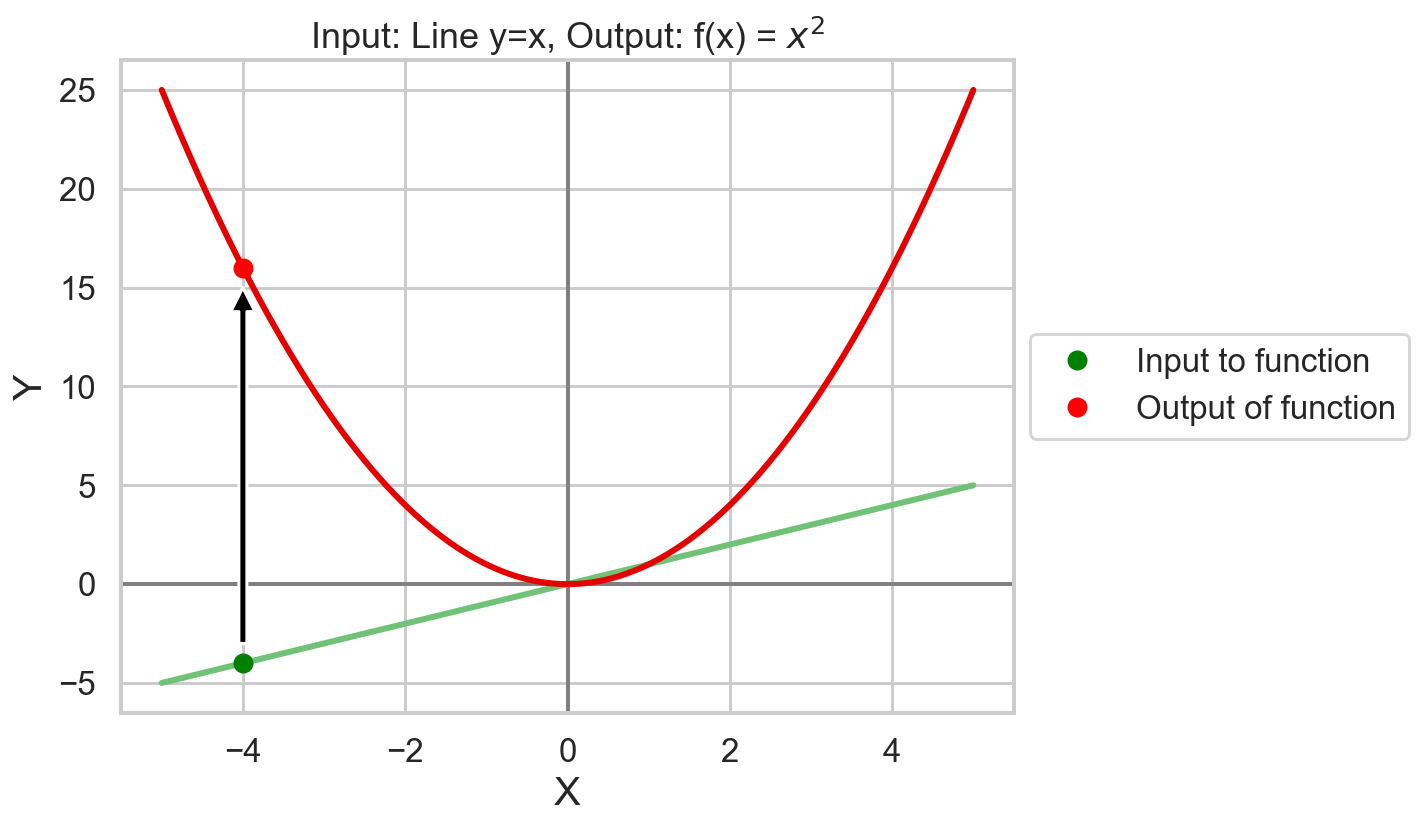

In [40]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x_loc = np.linspace(lower_bound, upper_bound, length)
x_val = x_loc 
y = square(x_val) 

plt.plot(x_loc, x_val, lw=3, c=sns.xkcd_rgb["soft green"])
plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])

marker_squared, = ax.plot(-4, 16, 'or', zorder=5)
marker_x, = ax.plot(-4, -4, 'og', zorder=5)

func_arrow_square = ax.annotate(
    '',
    xy=(-4, square(-4)),
    xytext=(-4, -4),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

plt.title(r'Input: Line y=x, Output: f(x) = $x^2$')

# Put a legend to the right of the current axis
ax.legend(
    (marker_x, marker_squared),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

Excellent, our input now is incredibly unambiguous! Our function $f$, when graphed, takes in an $x_{location}$ and $x_{value}$, in this case: $(-4, -4)$:

$$f((-4, -4)) \rightarrow (-4,16)$$

This can be done for every single point along the line $y=x$ (only three shown below):

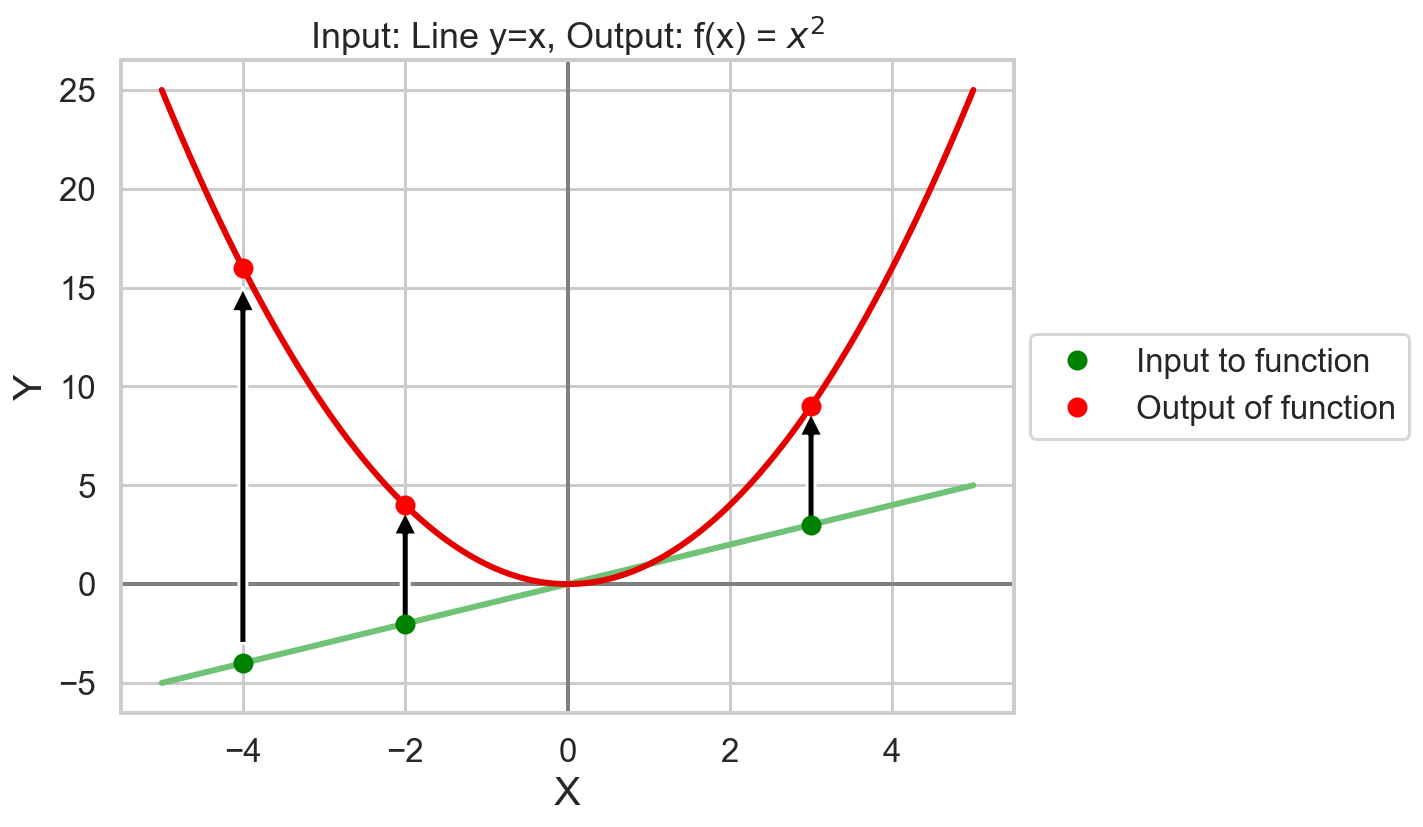

In [41]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')

lower_bound = -5
upper_bound = 5
composition_upper_bound = 25 
length = 2000

x_loc = np.linspace(lower_bound, upper_bound, length)
x_val = x_loc 
y = square(x_val) 

plt.plot(x_loc, x_val, lw=3, c=sns.xkcd_rgb["soft green"])
plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])

marker_squared_1, = ax.plot(-4, 16, 'or', zorder=5)
marker_x_1, = ax.plot(-4, -4, 'og', zorder=5)

marker_squared_2, = ax.plot(-2, 4, 'or', zorder=5)
marker_x_2, = ax.plot(-2, -2, 'og', zorder=5)

marker_squared_3, = ax.plot(3, 9, 'or', zorder=5)
marker_x_3, = ax.plot(3, 3, 'og', zorder=5)\

func_arrow_square_1 = ax.annotate(
    '',
    xy=(-4, square(-4)),
    xytext=(-4, -4),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

func_arrow_square_2 = ax.annotate(
    '',
    xy=(-2, square(-2)),
    xytext=(-2, -2),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

func_arrow_square_3 = ax.annotate(
    '',
    xy=(3, square(3)),
    xytext=(3, 3),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

plt.title(r'Input: Line y=x, Output: f(x) = $x^2$')

ax.legend(
    (marker_x, marker_squared),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
plt.show()

I want to make very clear why this generally does not cause an issue; When dealing with just one function operating on it's own, we can utilize the $x_{location}$ _as the_ $x_{value}$! We have been doing this since middle school when functions and their corresponding graphs were introduced.

You may be wondering why on earth we have introduced a seemingly more complex paradigm and notation, when our old method worked well enough to begin with? To answer that question, we will need to introduce **function compositions**.

#### 2.1.3 Function Compositions
Function compositions are simply the operation of taking the _output_ of a function $f$, using that as the _input_ to another function $g$, in order to produce a final _output_, which we can refer to as h(x). This is written as:

$$h(x) = g(f(x))$$

It can be broken down as follows:

$$f(x) = y$$

$$h(x) = g(y)$$

Notice this idea of passing the _output_ of the function $f$, as the _input_ to another function $g$. We can view this equivalently as a **mapping**:

$$f: X \rightarrow Y$$

$$g: Y \rightarrow Z$$

Where $f$ and $g$ are said to be **composed** to yield a function that maps $x$ in $X$ to $g(f(x))$ in $Z$. This idea of function compositions is why we spent so the time earlier distinguishing between a function and a graphical representation of a function. 

You may not initially realize it, but almost all functions other than most elementary are actually a composition of smaller functions! For example, consider the following:

$$h(x) = -x^2$$

Now, written as a I did above, it may be viewed as a single function. However, it is actually a composition of two separate functions:

$$\text{Negate Function:} \; \; \; g(x) = -x$$

$$\text{Square Function:} \; \; \; f(x) = x^2$$

Where we can then write $h$ as the composition of $f$ and $g$:

$$h(x) = g(f(x)) = -x^2$$

This may seem elementary but, I promise you we are building to an incredibly powerful mental framework! Recall the purpose of this post:

> Determine how you would derive an equation (red) that can approximate the the binomial distribution (green).

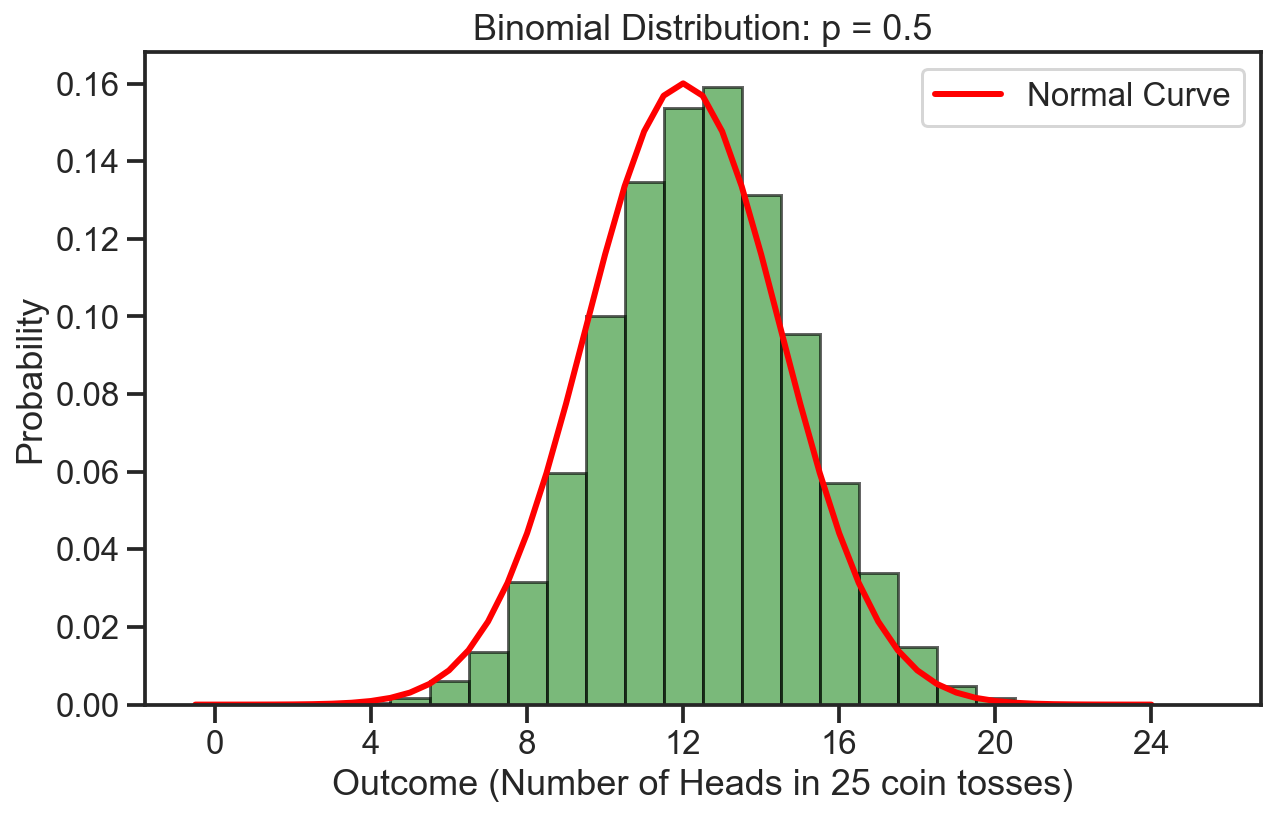

In [46]:
# generate binomial, n=25
fig = plt.figure(figsize=(10,6))
n = 25
data_binom = binom.rvs(n=n,p=0.5,size=10000)
bins = [i for i in range(n+2)]

ax = plt.hist(
    data_binom,
    bins=bins,
    density=True,
    rwidth=1,
    color='forestgreen',
    alpha=0.6,
    edgecolor="black"
)

plt.title('Binomial Distribution: p = 0.5')
plt.xlabel('Outcome (Number of Heads in 25 coin tosses)')
plt.ylabel('Probability')

xtick_loc = [i + 0.5 for i in range(n+1) if i % 4 == 0]
xtick_val = [i for i in range(n+1) if i % 4 == 0]
plt.xticks(xtick_loc, xtick_val)
x = np.arange(0, 25, 0.5)
p = norm.pdf(x, 12.5, data_binom.std())
plt.plot(x, p, 'k', linewidth=3, c='r')
plt.legend(['Normal Curve'])

plt.show()

What if I told you that figuring out how to approximate that red line was as easy as composing several elementary functions? You may think to yourself that that cannot be true, given the nature of the formula for the normal distribution. However, I assure you _it is true_.  

In order to make this as clear as possible, I am going to outline the exact composition of functions that will yield the bell shape of the normal distribution approximation above, and then walk through each individual step in detail. However, having the end result in mind will help us stay on track as we work through the mechanics. 

**General Function Composition of the Normal Distribution**<br>
The function composition that we will use in order to create the general shape/approximation of the normal distribution is shown below:

<img src="https://drive.google.com/uc?id=1FJdaM7gpzUIeP20DJQxZ5yvRyEaeP4ap">

In english, we are going to:

1. Take an input and square it to get an output.
2. Take that output and negate it, yield a new output.
3. Take the new output, exponentiate it, yielding a final output.

So, our functions can be defined as:

$$f(x) = x^2$$

$$g(x) = -x$$

$$h(x) = e^x$$

To make things more intuitive, I am going to replace $x$ with a more general term: $input$. This is because we often associate $x$ with the $x$ axis, and in function compositions this will be a hindrance:

$$f(input) = {input}^2$$

$$g(input) = -(input)$$

$$h(input) = e^{input}$$

The equations above have the same meaning as before, only now it should be even more apparent that each one operates on some _input_, returning an output. If we evaluate our entire function composition we arrive at:

$$let \; input = x$$

$$h \Big( g \big( f(x)\big) \Big) = h \Big( g \big( x^2 \big) \Big) = h \Big( -x^2 \Big) = e^{-x^2}$$

I am going to call the evaluated function composition above $n$, for normal:

$$n(x) = e^{-x^2}$$

Now, if we plot $n(x)$ for $x$ in the range $[-3, 3]$ we end up with:

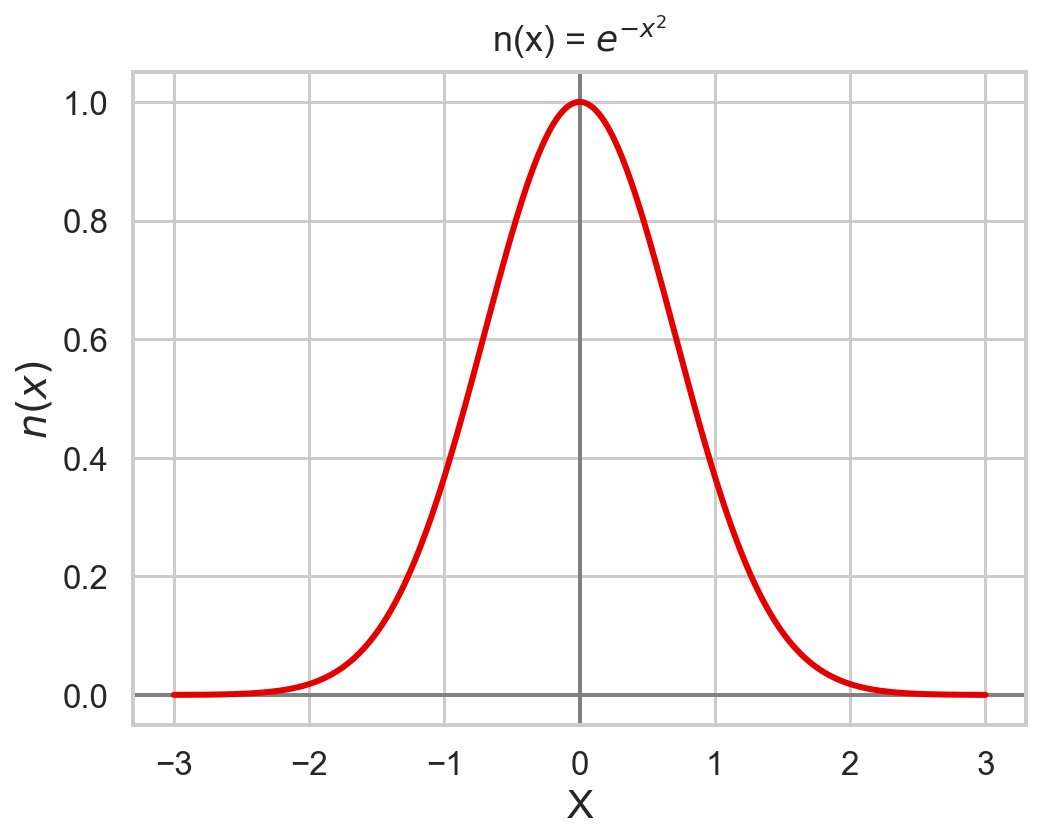

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

plt.axhline(y=0, color='grey')
plt.axvline(x=0, color='grey')

lower_bound = -3
upper_bound = 3
composition_upper_bound = 25 
length = 2000

def func_comp(x):
    return np.exp(-(x**2))

x = np.linspace(lower_bound, upper_bound, length)
y = func_comp(x) 

plt.plot(x, y, lw=3, c=sns.xkcd_rgb["red"])
plt.title(r'n(x) = $e^{-x^2}$', pad="10")
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel(r'$n(x)$', fontsize=20)
plt.show()

And just like that we end up with our desired shape! Of course this is not the exact normal distribution, there are cosmetic updates that must be made in order to ensure it meets the constraints of a valid probability distribution (more on that can be found in my post on the history of the normal distribution). However, the significance of what we just accomplised cannot be overlooked! By composing just three elementary functions we were able to end up with the shape of the normal distribution. Recall how intimidating that function looked at the outset of this post! 

Now, I have shown the end result and a very high level view of how we get there, simply composing three basic functions. As promised, we are now going to step through the details, using the concept of $x_{location}$ and $x_{value}$ that we discussed earlier. 

### 2.1.4 Function Compositions: Finding the shape of the Normal Distribution
I have already told you that the first thing that we are going to do in order to generate our approximation of the normal distribution is square our input $x$. This brings us back to what we spoke about earlier, that being the graphical representation of a function technically takes _two inputs_, a _location_ and a _value_.

We have already gone over why this is the case, and specifically so in relation to the function $f(x) = x^2$. This can be visualized below:

In [ ]:
lower_bound = -5
upper_bound = 5
length = 2000

# Turn off interactive plotting
plt.ioff()                        

# Create figure and axis object   
fig = plt.figure(figsize=(10, 6), dpi=150)       
ax1 = plt.subplot(111)

# Add x and y axis lines
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')

plt.tight_layout()

# Create iterable input axes, as well as set color of response curve
ax_input, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"])                         

# Create x input space, plot line x = y
x = np.linspace(lower_bound, upper_bound, length)
y = x 
ax1.plot(x, y, sns.xkcd_rgb["soft green"], linewidth=3)

# Create markers
marker1, = ax1.plot(lower_bound, 400, 'og')
marker2, = ax1.plot(lower_bound, 400, 'or')

# Create arrow representing function
func_arrow = ax1.annotate(
    '',
    xy=(lower_bound, square(lower_bound)),
    xytext=(lower_bound, lower_bound),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# Create label for arrow, representing function
offset = 2
func_label = ax1.annotate(
    'Square',
    xy=(lower_bound, square(lower_bound)/2),
    xytext=(lower_bound + offset, (square(lower_bound) - lower_bound)/2 + offset),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

# Square Animation function
def animate_square(current):
    x = np.linspace(lower_bound, current, length)
    x_squared = square(x)                               
    ax_input.set_data(x, x_squared) 
    marker1.set_data(current, current)
    marker2.set_data(current, square(current))
    
    func_arrow.set_position((current + 0.000001, current))
    func_arrow.xy = (current, x_squared[-1])
    
    func_label.set_position((current + offset + 0.000001, (x_squared[-1] - current)/2 + offset))
    func_label.xy = (current, (x_squared[-1] - current)/2 + current)
    
    return ax_input,

# Square init function
def init_square():
    ax1.set_xlim(-5, 5)                               
    ax1.set_ylim(-25, 25) 
    return ax_input,

""" Define steps and create animation object """
step = 0.025
steps = np.arange(lower_bound, upper_bound, step)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.65, box.height])

# Put a legend to the right of the current axis
ax1.legend(
    (marker1, marker2),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# For rendering html video in cell
# html_video = HTML(
#     animation.FuncAnimation(
#         fig,
#         animate_square,
#         steps,
#         init_func=init_square, 
#         interval=50,
#         blit=True
#     ).to_html5_video()
# )
# display(html_video)
gif_video = animation.FuncAnimation(
        fig,
        animate_square,
        steps,
        init_func=init_square, 
        interval=50,
        blit=True
    )

gif_video.save('x_squared.gif', writer='imagemagick')

plt.close()

<img src="https://drive.google.com/uc?id=1kOtx1gzNPu6n2k__cULQXqVztmg5cfGb" width="700">

Take note of the following in the animation above:
* We have a green point that is being passed into our function, $f$. 
* This green point has an $x_{location}$ and $x_{value}$
* The black arrow represents $f$, mapping the $x_{value}$ of the green point to the corresponding output value, $f(x)$
* The $x_{location}$ of a green input point and a corresponding red output point are always identical, hence the black arrow always being perpendicular to the $x$ axis

Now, this next part may very well be the most important piece of the entire post. What happens when we want to compose $f$, our squaring function, and $g$, our negation function? Well, as we discussed earlier, we will pass the _output of our squaring function_, the red curve above, into $g$. This will be mapped into a new output. Visually this looks like:

In [ ]:
lower_bound = -5
upper_bound = 5
length = 2000

# Turn off interactive plotting
plt.ioff()                        

# Create figure and axis object   
fig = plt.figure(figsize=(10, 6), dpi=150)       
ax1 = plt.subplot(111)

# Add x and y axis lines
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')

plt.tight_layout()

# Create iterable input axes, as well as set color of response curve
ax_input, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["pinkish"])                         

# Create x input space, plot line y = x^2
x = np.linspace(lower_bound, upper_bound, length)
y = square(x) 
ax1.plot(x, y, sns.xkcd_rgb["soft green"], linewidth=3)

# Create markers
marker1, = ax1.plot(lower_bound, 400, 'og')
marker2, = ax1.plot(lower_bound, 400, 'or')

# Create arrow representing function
func_arrow = ax1.annotate(
    '',
    xy=(lower_bound, negate(square(lower_bound))),
    xytext=(lower_bound, square(lower_bound)),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# Create label for arrow, representing function
offset = 1
shift = 5
func_label = ax1.annotate(
    'Negate',
    xy=(lower_bound, square(lower_bound)),
    xytext=(lower_bound + offset, (square(lower_bound) - lower_bound)/2 + offset),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

# Negate Animation function
def animate_negate(current):
    # Gathering x axis metrics
    x = np.linspace(lower_bound, current, length)
    x_squared = square(x)
    x_squared_negated = negate(x_squared)
    
    # Set output curve, marker1, marker2
    ax_input.set_data(x, x_squared_negated) 
    marker1.set_data(current, x_squared[-1])
    marker2.set_data(current, x_squared_negated[-1])
    
    # Set function arrow head and tail position
    func_arrow.set_position((current + 0.000001, x_squared[-1])) # Arrow tail
    func_arrow.xy = (current, x_squared_negated[-1]) # Arrow head
    
    # Label location, followed by label arrow head
    func_label.set_position((current + offset + 0.000001, (x_squared_negated[-1] - current)/2 + offset - shift))
    func_label.xy = (current, (x_squared[-1] - current)/2 + current)
    
    return ax_input,

# Negate init function
def init_negate():
    ax1.set_xlim(-5, 5)                               
    ax1.set_ylim(-25, 25) 
    return ax_input,

""" Define steps and create animation object """
step = 0.025
steps = np.arange(lower_bound, upper_bound, step)

# Shrink current axis by 20% in order to fit legend
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.65, box.height])

# Put a legend to the right of the current axis
ax1.legend(
    (marker1, marker2),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# For rendering html video in cell
# html_video = HTML(
#     animation.FuncAnimation(
#         fig,
#         animate_negate,
#         steps,
#         init_func=init_negate, 
#         interval=50,
#         blit=True
#     ).to_html5_video()
# )
# display(html_video)
gif_video = animation.FuncAnimation(
        fig,
        animate_negate,
        steps,
        init_func=init_negate, 
        interval=50,
        blit=True
    )

gif_video.save('x_squared_negated.gif', writer='imagemagick')

plt.close()

<img src="https://drive.google.com/uc?id=1vL8ifHeVZCKfrFCc8FpVcbWiQI5YtBNK" width="700">

And just like that, all of our earlier work relating to the details behind graphs of functions-specifically inputs have _locations_ and _values_-has paid off! This is exactly the scenario that requires us to expand our mental framework around what it means to graph a function. Let's run through what just happened and hone in on why our earlier work was necessary:
* In general when graphing a function, we simply take $x$ (being the _location_ along the) $x$ axis, and pass it in as an input.
* However, we discussed earlier how in reality, we are passing in a _location_ and a _value_, which just so happen to be equal for a stand alone function.
* When dealing with function composition's (above) the idea of _location_ and _value_ are _paramount_. 
* Our input to the negation function (the black arrow) is the _output_ of the square function!
* In other words, we have the green point representing our input. This input was just the _output_ of the square function. We pass that into the negate function, resulting in the red point, out new output. 

Again, it is so crucial to note that our input is made up an $x_{location}$ and $x_{value}$. For example, if we were not dealing with a graph and we had an input $x = 4$ passed into our negate function $g$:

$$g(4) = -4$$

However, here we need to be aware that the $x_{location}$ and $x_{value}$ are _no longer equivalent_! For instance, take a look at the squared input (green curve) above; at what $x_{location}$ does $x_{value} =4$? At $x_{location} = 2$! 

Because we are no longer just graphing a standard input $x$ where the location and value are equivalent (as is the case where $y=x$), our function needs to be able to handle both the $x_{location}$ and $x_{value}$. 

Now, let's add $h$ to our composition. So, $h$ will be passed the red curve above, $-x^2$, as input:

In [ ]:
lower_bound = -2
upper_bound = 2
length = 2000

# Turn off interactive plotting
plt.ioff()                        

# Create figure and axis object   
fig = plt.figure(figsize=(10, 6), dpi=150)       
ax1 = plt.subplot(111)

# Set x and y limits 
ax1.set_xlim((-2, 2))                               
ax1.set_ylim((-5, 5)) 

# Add x and y axis lines
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')

plt.tight_layout()

# Create iterable input axes, as well as set color of response curve
ax_input, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"])                         

# Create x input space, plot line y = -x^2
x = np.linspace(lower_bound, upper_bound, length)
y = negate(square(x)) 
ax1.plot(x, y, sns.xkcd_rgb["soft green"], linewidth=3)

# Create markers
marker1, = ax1.plot(lower_bound, 400, 'og')
marker2, = ax1.plot(lower_bound, 400, 'or')

# Create arrow representing function
func_arrow = ax1.annotate(
    '',
    xy=(lower_bound, exponentiate(negate(square(lower_bound)))),
    xytext=(lower_bound, negate(square(lower_bound))),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# Create label for arrow, representing function
offset_horizontal = 0.5
offset_vertical = -2
func_label = ax1.annotate(
    'Exponentiate',
    xy=(lower_bound, square(lower_bound)),
    xytext=(lower_bound + offset, (square(lower_bound) - lower_bound)/2 + offset),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=-90,angleB=0"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

# Exponentiate Animation function
def animate_exponentiate(current):
    # Gathering x axis metrics
    x = np.linspace(lower_bound, current, length)
    x_squared = square(x)
    x_squared_negated = negate(x_squared)
    x_squared_negated_exponentiated = exponentiate(x_squared_negated)

    # Set output curve, marker1, marker2
    ax_input.set_data(x, x_squared_negated_exponentiated) 
    marker1.set_data(current, x_squared_negated[-1])
    marker2.set_data(current, x_squared_negated_exponentiated[-1])

    # Set function arrow head and tail position
    func_arrow.set_position((current + 0.000001, x_squared_negated[-1])) # Arrow tail
    func_arrow.xy = (current, x_squared_negated_exponentiated[-1]) # Arrow head
    
    # Label location, followed by label arrow head
    label_arrow_pos = ((x_squared_negated_exponentiated[-1] - x_squared_negated[-1]) / 2 ) + x_squared_negated[-1]
    func_label.set_position((current + offset_horizontal, label_arrow_pos + offset_vertical))
    func_label.xy = (current, label_arrow_pos)
    
    return ax_input,

# Exponentiate init function
def init_exponentiate():
    return ax_input,

""" Define steps and create animation object """
step = 0.0125
steps = np.arange(lower_bound, upper_bound, step)

# Shrink current axis by 20% in order to fit legend
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.65, box.height])

# Put a legend to the right of the current axis
ax1.legend(
    (marker1, marker2),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# For rendering html video in cell
# html_video = HTML(
#     animation.FuncAnimation(
#         fig,
#         animate_exponentiate,
#         steps,
#         init_func=init_exponentiate, 
#         interval=50,
#         blit=True
#     ).to_html5_video()
# )
# display(html_video)
gif_video = animation.FuncAnimation(
        fig,
        animate_exponentiate,
        steps,
        init_func=init_exponentiate, 
        interval=50,
        blit=True
    )


gif_video.save('x_squared_negated_exponentiated.gif', writer='imagemagick')


plt.close()

<img src="https://drive.google.com/uc?id=1GvPjXHlRk1l-urBOS86NGpplyBtkwbhR" width="700">

Again, we see that we are passing in a 2 dimensional point to our function (in green) and that is being mapped to a 2 dimensional point (red), our output. The only way that we can intuitively understand the graph of the function $n(x) = e^{-x^2}$ as a composition of functions $f, g$ and $h$, is if we can follow passing curves (aka a list of two dimensional points) as inputs to these functions. 

The ability to do that is an incredibly powerful skill. When we put everything together

We can visualize our entire function composition as follows:

In [ ]:
# ZOOMED ANIMATION
lower_bound = -2
upper_bound = -1 * lower_bound
composition_upper_bound = upper_bound * 4 + upper_bound 
length = 2000

# Turn off interactive plotting
plt.ioff()                        

# Create figure and axis object   
fig = plt.figure(figsize=(10, 6), dpi=200)       
ax1 = plt.subplot(111)

# Add x and y axis lines
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')

plt.tight_layout()

# Create x input space, plot line x = y
x = np.linspace(lower_bound, upper_bound, length)
y = x 

# Create iterable input axes, as well as set color of response curve
ax_x, = ax1.plot(x, y, lw=3, c=sns.xkcd_rgb["soft green"], zorder=1)   
ax_squared, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"], zorder=2)   
ax_negated, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"], zorder=3)   
ax_exponentiated, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"], zorder=4)   

# Create markers
marker_x, = ax1.plot(lower_bound, 400, 'og', zorder=5)
marker_squared, = ax1.plot(lower_bound, 400, 'or', zorder=5)
marker_negated, = ax1.plot(lower_bound, 400, 'or', zorder=5)
marker_exponentiated, = ax1.plot(lower_bound, 400, 'or', zorder=5)

offset = 0.5 # General offset

# ------------- Create arrow representing SQUARE function---------------
func_arrow_square = ax1.annotate(
    '',
    xy=(lower_bound, square(lower_bound)),
    xytext=(lower_bound, lower_bound),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# ------------- Create label for arrow, representing SQUARE function ----------------
offset_square = 0.5
epsilon = 0.000001
func_label_square = ax1.annotate(
    'Square',
    xy=(lower_bound, square(lower_bound)/2),
    xytext=(lower_bound + offset_square, (square(lower_bound) - lower_bound)/2 + offset_square),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

# ------------- Create arrow representing NEGATE function---------------
negate_hide_coord = -10
func_arrow_negate = ax1.annotate(
    '',
    xy=(negate_hide_coord, negate_hide_coord),
    xytext=(negate_hide_coord, negate_hide_coord),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# ------------- Create label for arrow, representing NEGATE function ----------------
offset_negate = 1
shift = 1
func_label_negate = ax1.annotate(
    'Negate',
    xy=(negate_hide_coord, negate_hide_coord),
    xytext=(negate_hide_coord+0.01, negate_hide_coord),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

# ------------- Create arrow representing EXPONENTIATE function---------------
exponentiate_hide_coord = -10
func_arrow_exponentiate = ax1.annotate(
    '',
    xy=(exponentiate_hide_coord, exponentiate_hide_coord),
    xytext=(exponentiate_hide_coord, exponentiate_hide_coord),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# ------------- Create label for arrow, representing EXPONENTIATE function ----------------
offset_horizontal = 0.5
offset_vertical = -2
func_label_exponentiate = ax1.annotate(
    'Exponentiate',
    xy=(exponentiate_hide_coord, exponentiate_hide_coord),
    xytext=(exponentiate_hide_coord, exponentiate_hide_coord),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=-90,angleB=0"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

function_calculation_label = ax1.annotate(
    '   ',
    xy=(2, 2),
    size=20,
)

# Composition animation function
def animate_composition(current):
    if round(current, 5) < upper_bound:
        # Gathering x axis metrics
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)

        # Set output curve, marker_x, marker_squared
        ax_squared.set_data(x, x_squared) 
        marker_x.set_data(current, current)
        marker_squared.set_data(current, x_squared[-1])

        # Set function arrow head and tail position
        func_arrow_square.set_position((current + epsilon, current))
        func_arrow_square.xy = (current, x_squared[-1])

        # Label location, followed by label arrow head
        func_label_square.set_position((current + offset + epsilon, (x_squared[-1] - current)/2 + offset))
        func_label_square.xy = (current, (x_squared[-1] - current)/2 + current)
        
        # Set function calculation lable
        function_calculation_label.set_text(r'  ({})$^2$ = {}'.format(round(current, 1), round(x_squared[-1], 1)))
        
        
    elif round(current, 5) == upper_bound:
        # End of squaring, start of negating
        func_arrow_square.remove()
        marker_x.remove()
        func_label_square.remove()
        
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)
        
        # Updating squared curve to be input to negate function (setting color to green)
        marker_squared.set_color("green")
        ax1.plot(x, y, lw=3, c=sns.xkcd_rgb["grey"])  
        ax1.plot(x, x_squared, c=sns.xkcd_rgb["soft green"], linewidth=3)

    elif round(current, 5) > upper_bound and round(current, 5) < (upper_bound*3) :
        current -= upper_bound*2 
        
        # Gathering x axis metrics
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)
        x_squared_negated = negate(x_squared)

        # Set output curve, marker1, marker2
        ax_negated.set_data(x, x_squared_negated) 
        marker_squared.set_data(current, x_squared[-1])
        marker_negated.set_data(current, x_squared_negated[-1])

        # Set function arrow head and tail position
        func_arrow_negate.set_position((current + 0.000001, x_squared[-1])) # Arrow tail
        func_arrow_negate.xy = (current, x_squared_negated[-1]) # Arrow head

        # Label location, followed by label arrow head
        func_label_negate.set_position((current + offset + 0.000001, (x_squared_negated[-1] - current)/2 + offset - shift))
        func_label_negate.xy = (current, (x_squared[-1] - current)/2 + current)   
        
        # Set function calculation lable
        function_calculation_label.set_text('  -({}) = {}'.format(round(x_squared[-1], 1), round(x_squared_negated[-1], 1)))
        
    elif round(current, 5) == (upper_bound*3):
        # End of negating, start of exponentiating
        func_arrow_negate.remove()
        func_label_negate.remove()
        marker_squared.remove()
        
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)
        x_squared_negated = negate(x_squared)
        
        # Updating negated curve to be input to negate function (setting color to green)
        marker_negated.set_color("green")
        ax1.plot(x, x_squared, lw=3, c=sns.xkcd_rgb["grey"])  
        ax1.plot(x, x_squared_negated, c=sns.xkcd_rgb["soft green"], linewidth=3, zorder=4)
    
    elif round(current, 5) > (upper_bound*3) and round(current, 5) < (upper_bound*5):
        current -= upper_bound*4  
        
        # Gathering x axis metrics
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)
        x_squared_negated = negate(x_squared)
        x_squared_negated_exponentiated = exponentiate(x_squared_negated)

        # Set output curve, marker1, marker2
        ax_exponentiated.set_data(x, x_squared_negated_exponentiated) 
        marker_negated.set_data(current, x_squared_negated[-1])
        marker_exponentiated.set_data(current, x_squared_negated_exponentiated[-1])

        # Set function arrow head and tail position
        func_arrow_exponentiate.set_position((current + 0.000001, x_squared_negated[-1])) # Arrow tail
        func_arrow_exponentiate.xy = (current, x_squared_negated_exponentiated[-1]) # Arrow head

        # Label location, followed by label arrow head
        label_arrow_pos = ((x_squared_negated_exponentiated[-1] - x_squared_negated[-1]) / 2 ) + x_squared_negated[-1]
        func_label_exponentiate.set_position((current + offset_horizontal, label_arrow_pos + offset_vertical))
        func_label_exponentiate.xy = (current, label_arrow_pos)
        
        # Set function calculation lable
        function_calculation_label.set_text('  exp({}) = {}'.format(round(x_squared_negated[-1], 1), round(x_squared_negated_exponentiated[-1], 1)))
    
    return ax_x,

# Composition init function
def init_composition():
    ax1.set_xlim(lower_bound, upper_bound)                               
    ax1.set_ylim(-4, 4) 
    return ax_x,

""" Define steps and create animation object """
step = 0.0125
# step = 0.05
steps = np.arange(lower_bound, composition_upper_bound, step)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.65, box.height])

# Put a legend to the right of the current axis
ax1.legend(
    (marker_x, marker_squared),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# For rendering html video in cell
gif_video = animation.FuncAnimation(
    fig,
    animate_composition,
    steps,
    init_func=init_composition, 
    interval=25,
    blit=True
    )

gif_video.save('test_2.gif', writer='imagemagick')
plt.close()



<img src="https://drive.google.com/uc?id=1udWyIAPAKUXS6ra7nA7VpWwnaYdTVD3t" width="700">

What we can also do is overlay $n(x)$ (in pink below) in order to see how our original input is transformed in just three steps to match the bell shaped approximation to the normal distribution that we were looking for:

In [ ]:
# ZOOMED ANIMATION
lower_bound = -2
upper_bound = -1 * lower_bound
composition_upper_bound = upper_bound * 4 + upper_bound 
length = 2000

# Turn off interactive plotting
plt.ioff()                        

# Create figure and axis object   
fig = plt.figure(figsize=(10, 6), dpi=200)       
ax1 = plt.subplot(111)

# Add x and y axis lines
ax1.axhline(y=0, color='grey')
ax1.axvline(x=0, color='grey')

plt.tight_layout()

# Create x input space, plot line x = y
x = np.linspace(lower_bound, upper_bound, length)
y = x 
func_comp_y = func_comp(x)

# Create iterable input axes, as well as set color of response curve
ax_x, = ax1.plot(x, y, lw=3, c=sns.xkcd_rgb["soft green"], zorder=1)   
ax_squared, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"], zorder=2)   
ax_negated, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"], zorder=3)   
ax_exponentiated, = ax1.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"], zorder=4)  
ax_func_comp, = ax1.plot(x, func_comp_y, lw=3, c=sns.xkcd_rgb["pink"], zorder=1)   


# Create markers
marker_x, = ax1.plot(lower_bound, 400, 'og', zorder=5)
marker_squared, = ax1.plot(lower_bound, 400, 'or', zorder=5)
marker_negated, = ax1.plot(lower_bound, 400, 'or', zorder=5)
marker_exponentiated, = ax1.plot(lower_bound, 400, 'or', zorder=5)

offset = 0.5 # General offset

# ------------- Create arrow representing SQUARE function---------------
func_arrow_square = ax1.annotate(
    '',
    xy=(lower_bound, square(lower_bound)),
    xytext=(lower_bound, lower_bound),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# ------------- Create label for arrow, representing SQUARE function ----------------
offset_square = 0.5
epsilon = 0.000001
func_label_square = ax1.annotate(
    'Square',
    xy=(lower_bound, square(lower_bound)/2),
    xytext=(lower_bound + offset_square, (square(lower_bound) - lower_bound)/2 + offset_square),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

# ------------- Create arrow representing NEGATE function---------------
negate_hide_coord = -10
func_arrow_negate = ax1.annotate(
    '',
    xy=(negate_hide_coord, negate_hide_coord),
    xytext=(negate_hide_coord, negate_hide_coord),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# ------------- Create label for arrow, representing NEGATE function ----------------
offset_negate = 1
shift = 1
func_label_negate = ax1.annotate(
    'Negate',
    xy=(negate_hide_coord, negate_hide_coord),
    xytext=(negate_hide_coord+0.01, negate_hide_coord),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=0,angleB=-90"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

# ------------- Create arrow representing EXPONENTIATE function---------------
exponentiate_hide_coord = -10
func_arrow_exponentiate = ax1.annotate(
    '',
    xy=(exponentiate_hide_coord, exponentiate_hide_coord),
    xytext=(exponentiate_hide_coord, exponentiate_hide_coord),
    arrowprops=dict(facecolor='black', shrink=0.05),
)

# ------------- Create label for arrow, representing EXPONENTIATE function ----------------
offset_horizontal = 0.5
offset_vertical = -2
func_label_exponentiate = ax1.annotate(
    'Exponentiate',
    xy=(exponentiate_hide_coord, exponentiate_hide_coord),
    xytext=(exponentiate_hide_coord, exponentiate_hide_coord),
    arrowprops=dict(
        color='grey',
        arrowstyle="-",
        connectionstyle="angle3,angleA=-90,angleB=0"
    ),
    bbox=dict(boxstyle="square", alpha=0.1, ec="gray"),
    size=20,
)

function_calculation_label = ax1.annotate(
    '   ',
    xy=(2, 2),
    size=20,
)

# Composition animation function
def animate_composition(current):
    if round(current, 5) < upper_bound:
        # Gathering x axis metrics
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)

        # Set output curve, marker_x, marker_squared
        ax_squared.set_data(x, x_squared) 
        marker_x.set_data(current, current)
        marker_squared.set_data(current, x_squared[-1])

        # Set function arrow head and tail position
        func_arrow_square.set_position((current + epsilon, current))
        func_arrow_square.xy = (current, x_squared[-1])

        # Label location, followed by label arrow head
        func_label_square.set_position((current + offset + epsilon, (x_squared[-1] - current)/2 + offset))
        func_label_square.xy = (current, (x_squared[-1] - current)/2 + current)
        
        # Set function calculation lable
        function_calculation_label.set_text(r'  ({})$^2$ = {}'.format(round(current, 1), round(x_squared[-1], 1)))
        
        
    elif round(current, 5) == upper_bound:
        # End of squaring, start of negating
        func_arrow_square.remove()
        marker_x.remove()
        func_label_square.remove()
        
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)
        
        # Updating squared curve to be input to negate function (setting color to green)
        marker_squared.set_color("green")
        ax1.plot(x, y, lw=3, c=sns.xkcd_rgb["grey"])  
        ax1.plot(x, x_squared, c=sns.xkcd_rgb["soft green"], linewidth=3)

    elif round(current, 5) > upper_bound and round(current, 5) < (upper_bound*3) :
        current -= upper_bound*2 
        
        # Gathering x axis metrics
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)
        x_squared_negated = negate(x_squared)

        # Set output curve, marker1, marker2
        ax_negated.set_data(x, x_squared_negated) 
        marker_squared.set_data(current, x_squared[-1])
        marker_negated.set_data(current, x_squared_negated[-1])

        # Set function arrow head and tail position
        func_arrow_negate.set_position((current + 0.000001, x_squared[-1])) # Arrow tail
        func_arrow_negate.xy = (current, x_squared_negated[-1]) # Arrow head

        # Label location, followed by label arrow head
        func_label_negate.set_position((current + offset + 0.000001, (x_squared_negated[-1] - current)/2 + offset - shift))
        func_label_negate.xy = (current, (x_squared[-1] - current)/2 + current)   
        
        # Set function calculation lable
        function_calculation_label.set_text('  -({}) = {}'.format(round(x_squared[-1], 1), round(x_squared_negated[-1], 1)))
        
    elif round(current, 5) == (upper_bound*3):
        # End of negating, start of exponentiating
        func_arrow_negate.remove()
        func_label_negate.remove()
        marker_squared.remove()
        
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)
        x_squared_negated = negate(x_squared)
        
        # Updating negated curve to be input to negate function (setting color to green)
        marker_negated.set_color("green")
        ax1.plot(x, x_squared, lw=3, c=sns.xkcd_rgb["grey"])  
        ax1.plot(x, x_squared_negated, c=sns.xkcd_rgb["soft green"], linewidth=3, zorder=4)
    
    elif round(current, 5) > (upper_bound*3) and round(current, 5) < (upper_bound*5):
        current -= upper_bound*4  
        
        # Gathering x axis metrics
        x = np.linspace(lower_bound, current, length)
        x_squared = square(x)
        x_squared_negated = negate(x_squared)
        x_squared_negated_exponentiated = exponentiate(x_squared_negated)

        # Set output curve, marker1, marker2
        ax_exponentiated.set_data(x, x_squared_negated_exponentiated) 
        marker_negated.set_data(current, x_squared_negated[-1])
        marker_exponentiated.set_data(current, x_squared_negated_exponentiated[-1])

        # Set function arrow head and tail position
        func_arrow_exponentiate.set_position((current + 0.000001, x_squared_negated[-1])) # Arrow tail
        func_arrow_exponentiate.xy = (current, x_squared_negated_exponentiated[-1]) # Arrow head

        # Label location, followed by label arrow head
        label_arrow_pos = ((x_squared_negated_exponentiated[-1] - x_squared_negated[-1]) / 2 ) + x_squared_negated[-1]
        func_label_exponentiate.set_position((current + offset_horizontal, label_arrow_pos + offset_vertical))
        func_label_exponentiate.xy = (current, label_arrow_pos)
        
        # Set function calculation lable
        function_calculation_label.set_text('  exp({}) = {}'.format(round(x_squared_negated[-1], 1), round(x_squared_negated_exponentiated[-1], 1)))
    
    return ax_x,

# Composition init function
def init_composition():
    ax1.set_xlim(lower_bound, upper_bound)                               
    ax1.set_ylim(-4, 4) 
    return ax_x,

""" Define steps and create animation object """
step = 0.025
# step = 0.05
steps = np.arange(lower_bound, composition_upper_bound, step)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.65, box.height])

# Put a legend to the right of the current axis
ax1.legend(
    (marker_x, marker_squared),
    ['Input to function', 'Output of function'],
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

# For rendering html video in cell
gif_video = animation.FuncAnimation(
        fig,
        animate_composition,
        steps,
        init_func=init_composition, 
        interval=50,
        blit=True
    )


gif_video.save('function_composition_with_final.gif', writer='imagemagick')

plt.close()

<img src="https://drive.google.com/uc?id=139CaUK0aH9OX7QYFpI9_iWFsH6ozkre2" width="700">

We have officially accomplished our goal, that being to determine a general function that could act as the normal distribution and approximate the discrete binomial distribution we saw earlier. There are additional cosmetic updates that must be made, and I have an entire post dedicated to that if you are interested (the history of the normal distribution).

The shape of the normal distribution can be approximated via our curve $n(x)$:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

$$ n(x) = e^{-x^2}$$

$$n(x) \rightarrow \text{Is an approximation of the shape} \rightarrow f(x \mid \mu, \sigma^2)$$

With that said, there is a much larger theme of this post that I would like you to leave with. Thousands upon thousands of formulas and equations have been derived over the past 2000 years; they span quantum mechanics, network theory, statistical learning, financial modeling, computational biology, and so on. Often times you will be presented with one of these equations in a text book and expected to take it on face value, or given a erudite proof. 

However, what is often left out is the underlying process that was used to arrive at that equation. I want you to be able to find your equations, to create your own solutions to the hard problems that face our world today. One of the most fundamental ways that this is done in mathematics and related sciences is via the following process:

1. Collecting data on whatever it is you want to know more about. That could the financial markets, the force due to gravity, the rate at which bacteria grow in a petri dish, etc.
2. That data gives you a discrete representation of some underlying function (how the financial markets respond due to certain inputs, how the force of gravity is effected by distance, how bacteria grow in a petri dish as a function of time). You can plot this discrete data and get a representation like the binomial distribution we saw earlier.
3. You want to find the underlying function that accounts for this data! In other words, you want to find a function, $f$, that when you input your collected data everything checks out! **This is one of the most important problems in all of mathematics and science**.
4. Most people don't have the slightest idea of where to start when they hit this point. But, you on the other hand now do. Function composition is your friend. Mapping inputs from one space to another, composing many functions, it is how many of the greatest laws of math and science have been derived! 